In [7]:
#importing Libraries
import ast 
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading data 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [11]:
df_exploded = df.explode('job_skills')

<Axes: xlabel='job_skills'>

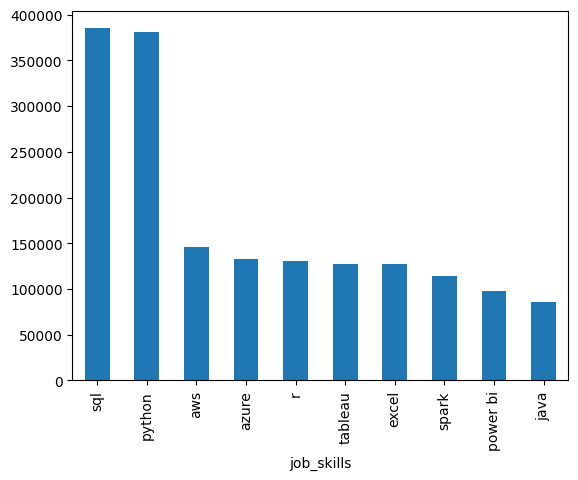

In [13]:
df_exploded['job_skills'].value_counts().head(10).plot(kind = 'bar')

In [14]:
df_exploded.groupby(['job_skills', 'job_title_short']).size()

job_skills  job_title_short          
airflow     Business Analyst               318
            Cloud Engineer                 260
            Data Analyst                  2002
            Data Engineer                25505
            Data Scientist                3915
                                         ...  
zoom        Machine Learning Engineer       46
            Senior Data Analyst             86
            Senior Data Engineer           122
            Senior Data Scientist           79
            Software Engineer              229
Length: 2256, dtype: int64

In [16]:
skills_count = df_exploded.groupby(['job_skills', 'job_title_short']).size()

In [23]:
df_skills_count = skills_count.reset_index(name= 'skill_count')

df_skills_count = df_skills_count.sort_values(by='skill_count', ascending= False)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


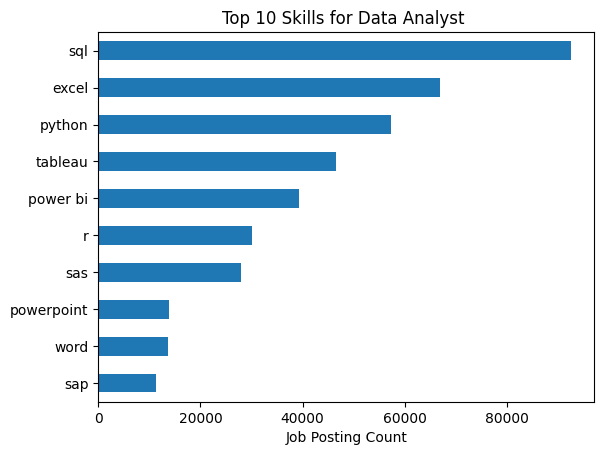

In [33]:
job_title = 'Data Analyst'
top_skills = 10 
df_skill_final= df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills) 

df_skill_final.plot(kind = 'barh', x = 'job_skills', y = 'skill_count')

plt.gca().invert_yaxis()

plt.title(f'Top {top_skills} Skills for {job_title} ')

plt. xlabel('Job Posting Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()